In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pre_process(data):
    # Remove the patient layer
    new_data = {}
    for patient, patient_data in data.items():
        for document_name, document_data in patient_data.items():
            new_key = f"{patient}:{document_name}"
            new_data[new_key] = document_data
    # Flatten the nested dictionary
    pd_data = []
    for document, models in new_data.items():
        for model, questions in models.items():
            for question, metrics in questions.items():
                row = {"Document": document, "Model": model, "Question": question}
                row.update(metrics)
                pd_data.append(row)
    return pd.DataFrame(pd_data)

# Load the JSON file
with open("evaluation_results.json") as f:
    data = json.load(f)

# Pre-process the data
df = pre_process(data)
df.head()

,Document,Model,Question,nli_label,nli_score,lcs_score
0,fake_patient1:fake_patient1_doc1_RAD,gpt-4,name,entailment,0.931692,1.000000
1,fake_patient1:fake_patient1_doc1_RAD,gpt-4,type,entailment,0.974476,1.000000
2,fake_patient1:fake_patient1_doc1_RAD,gpt-4,date,entailment,0.748786,0.892857
3,fake_patient1:fake_patient1_doc1_RAD,gpt-4,episode,contradiction,0.357680,0.785714
4,fake_patient1:fake_patient1_doc1_RAD,gpt-4,sections,entailment,0.993209,0.244898


                     nli_score  lcs_score
Model                                    
gemini-pro            0.716896   0.544145
gpt-3.5-turbo-0613    0.745551   0.689059
gpt-4                 0.755217   0.668979
llama-2-13b-chat      0.734318   0.745175
llama-2-70b-chat      0.717276   0.726082
llama-2-7b-chat       0.715815   0.753582
vicuna-13b-v1.5-16k   0.697767   0.696934
vicuna-33b-v1.3       0.730349   0.726136
vicuna-7b-v1.5-16k    0.693220   0.722282


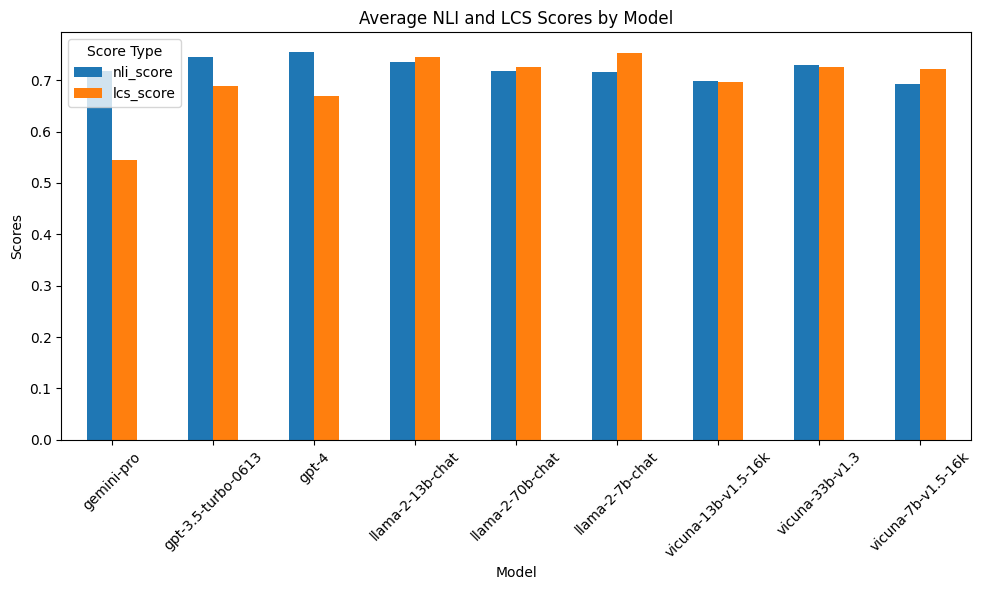

In [3]:
# Calculate the nli_score and lcs_score averages for each model
avg_by_model = df.groupby("Model")[["nli_score", "lcs_score"]].mean()
print(avg_by_model)

# Plotting the average scores by Model
avg_by_model.plot(kind="bar", figsize=(10, 6))
plt.title("Average NLI and LCS Scores by Model")
plt.xlabel("Model")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.legend(title="Score Type")
plt.tight_layout()
plt.show()

                   nli_score  lcs_score
Question                               
attributes          0.530253   0.336335
classUri-mentions   0.556770   0.325433
date                0.722373   0.777313
episode             0.554784   0.835429
name                0.871007   0.985948
sections            0.885874   0.625948
type                0.939477   0.992108


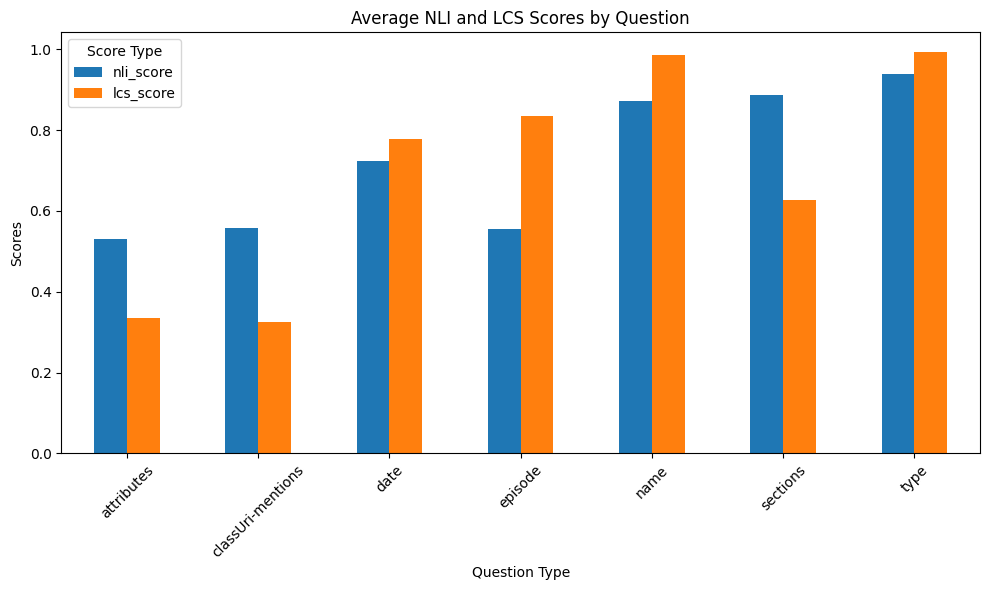

In [4]:
# Calculate the nli_score and lcs_score averages for each question
avg_by_question = df.groupby("Question")[["nli_score", "lcs_score"]].mean()
print(avg_by_question)

# Plotting the average scores by Question
avg_by_question.plot(kind="bar", figsize=(10, 6))
plt.title("Average NLI and LCS Scores by Question")
plt.xlabel("Question Type")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.legend(title="Score Type")
plt.tight_layout()
plt.show()

        Model                                Document  nli_score  lcs_score
0  gemini-pro  fake_patient1:fake_patient1_doc10_NOTE   0.767777   0.461214
1  gemini-pro    fake_patient1:fake_patient1_doc1_RAD   0.763898   0.607111
2  gemini-pro     fake_patient1:fake_patient1_doc2_SP   0.694305   0.511790
3  gemini-pro   fake_patient1:fake_patient1_doc3_NOTE   0.690245   0.451519
4  gemini-pro   fake_patient1:fake_patient1_doc4_NOTE   0.652951   0.476713


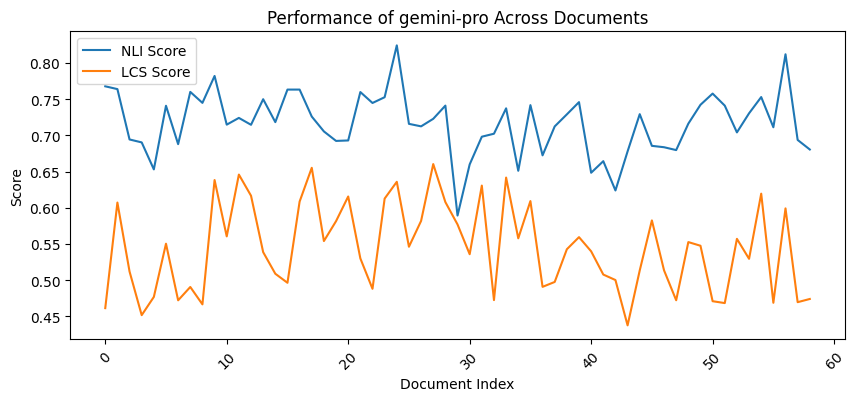

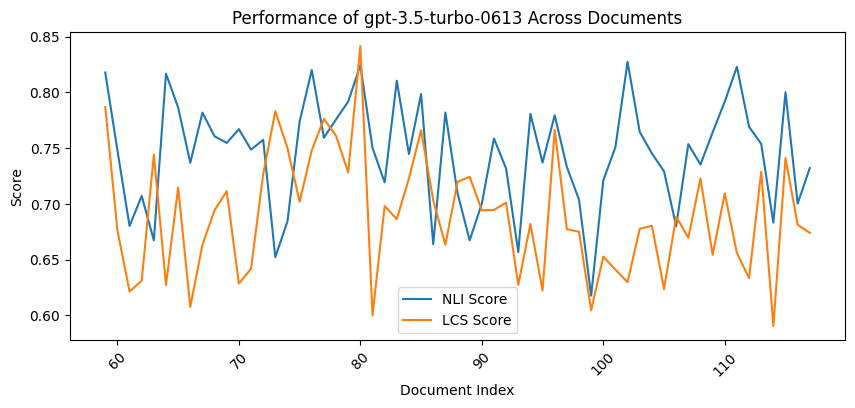

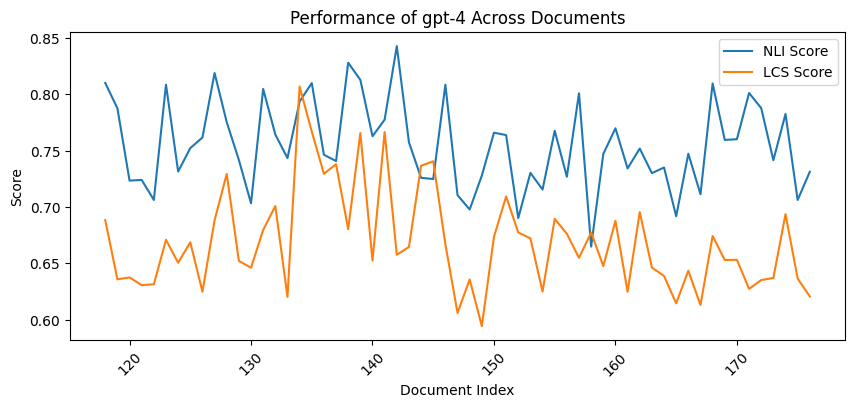

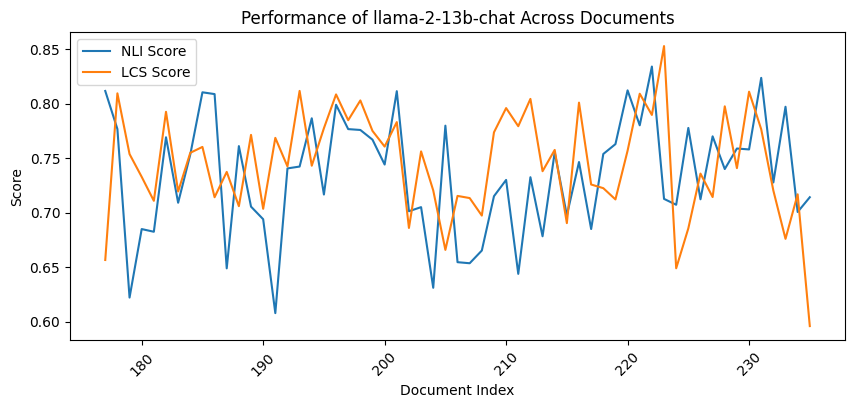

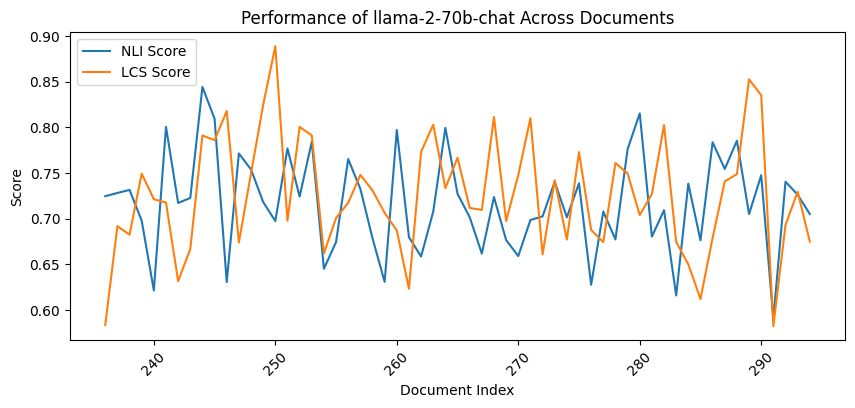

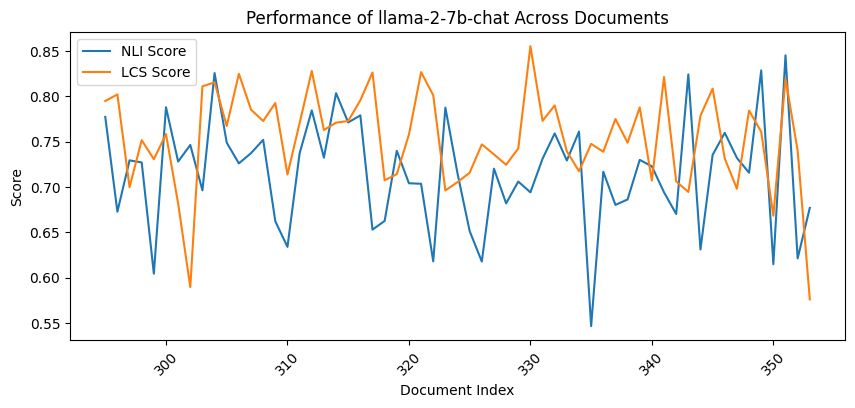

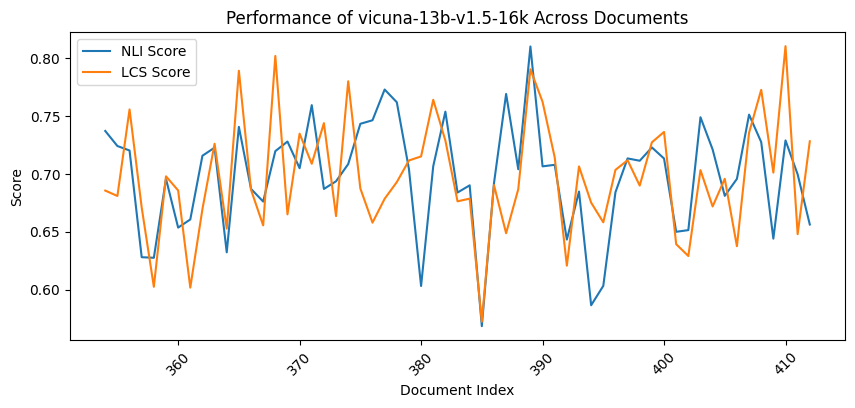

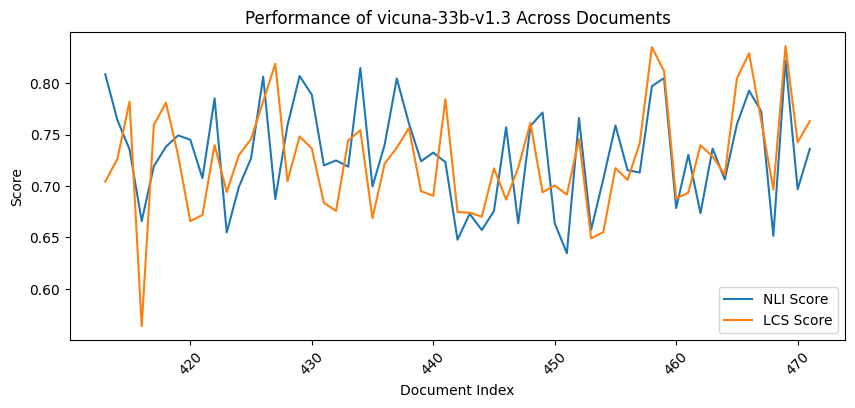

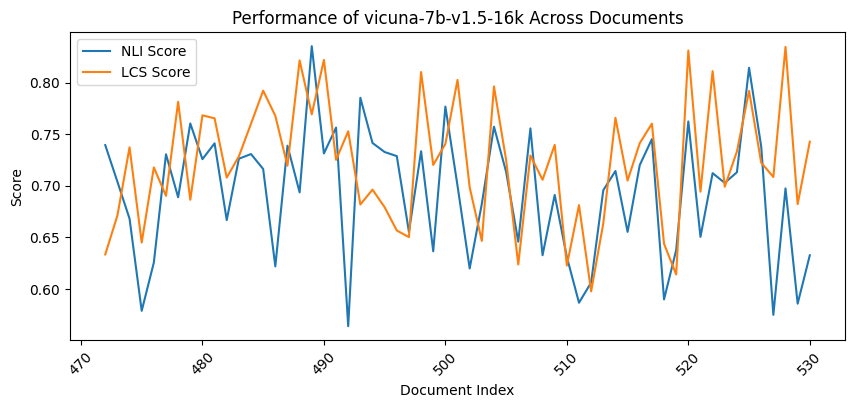

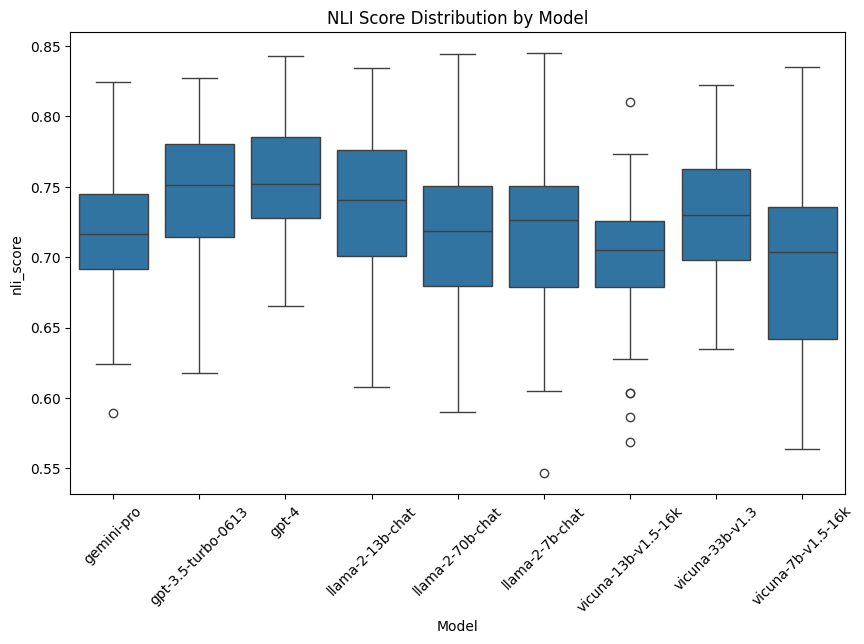

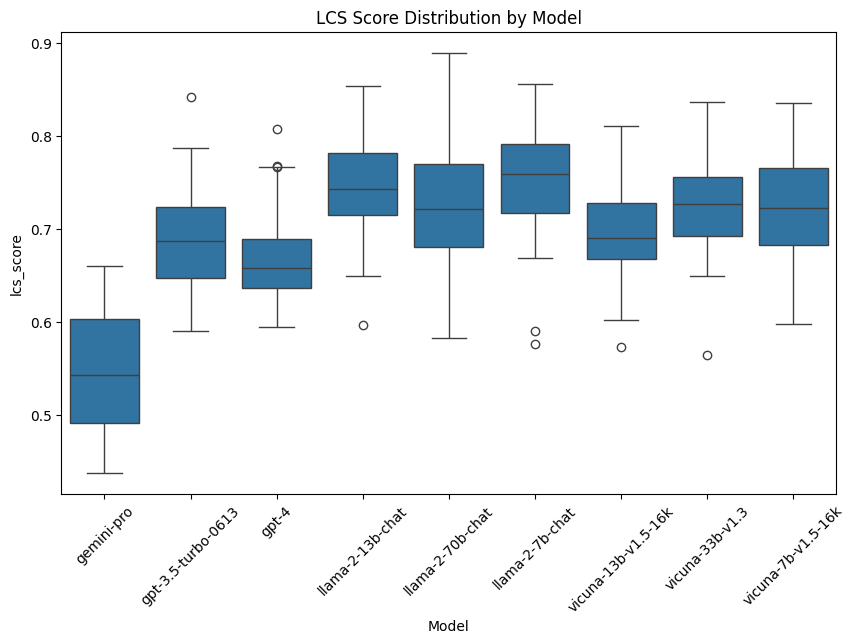

In [5]:
# Group by Model and Document
model_document_performance = (
    df.groupby(["Model", "Document"])[["nli_score", "lcs_score"]].mean().reset_index()
)
print(model_document_performance.head())

# Line Charts for each model
for model in model_document_performance["Model"].unique():
    model_data = model_document_performance[
        model_document_performance["Model"] == model
    ]
    plt.figure(figsize=(10, 4))
    plt.plot(model_data["Document"].index, model_data["nli_score"], label="NLI Score")
    plt.plot(model_data["Document"].index, model_data["lcs_score"], label="LCS Score")
    plt.title(f"Performance of {model} Across Documents")
    plt.xlabel("Document Index")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Box Plots for each model
plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="nli_score", data=model_document_performance)
plt.title("NLI Score Distribution by Model")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="lcs_score", data=model_document_performance)
plt.title("LCS Score Distribution by Model")
plt.xticks(rotation=45)
plt.show()

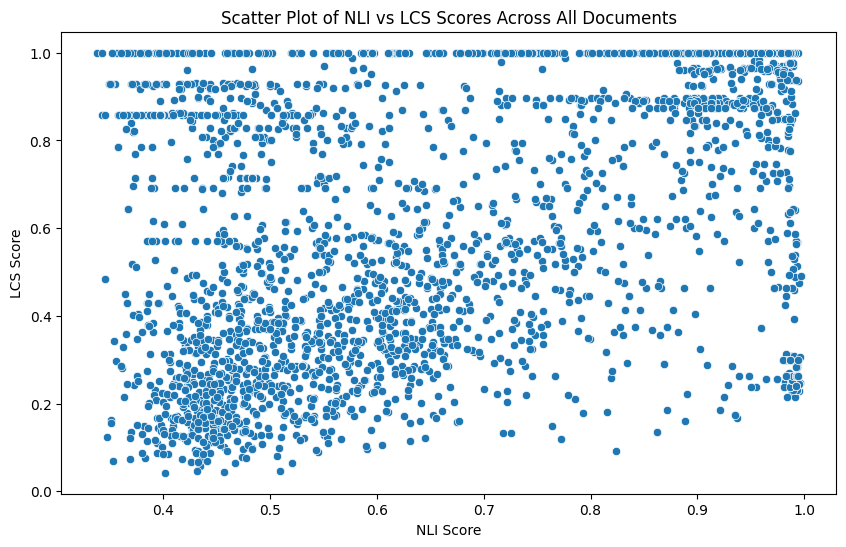

           nli_score  lcs_score
nli_score   1.000000   0.528369
lcs_score   0.528369   1.000000


In [11]:
# Create a scatter plot to visualize the correlation between NLI and LCS scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="nli_score", y="lcs_score")
plt.title("Scatter Plot of NLI vs LCS Scores Across All Documents")
plt.xlabel("NLI Score")
plt.ylabel("LCS Score")
plt.show()

# Calculate the correlation coefficient between NLI and LCS scores
correlation_matrix = df[["nli_score", "lcs_score"]].corr()
print(correlation_matrix)

In [10]:
# Scatter plot for each model's NLI vs LCS scores
plt.figure(figsize=(10, 6))
for model in df["Model"].unique():
    model_df = df[df["Model"] == model]
    plt.scatter(model_df["nli_score"], model_df["lcs_score"], label=model)
plt.title("Scatter Plot of NLI vs LCS Scores")
plt.xlabel("NLI Score")
plt.ylabel("LCS Score")
plt.legend()
plt.show()